# **Actividad Portafolio de Inversión**
En esta actividad se realizará un portafolio de inversión con la ayuda de datos de acceso libre y evaluandolo usando la teoría desarrollada por Harry Markowitz.

Markowitz desarrolló un modelo de evaluación de carteras o portafolios de inversión basados en los rendimientos esperados y la variabilidad en el comportamiento de las inversiones.

El modelo de Markowitz también se denomina modelo de **media varianza** debido a que se basa en los rendimientos esperados (**media**) y la desviación estándar (**varianza**) de las diversas carteras. Harry Markowitz hizo las siguientes suposiciones al desarrollar el modelo HM:

1. El **riesgo** de una cartera se basa en la variabilidad de los rendimientos de dicha cartera.

2. Un inversor es reacio al riesgo.

3. Un inversor maximiza el rendimiento de su cartera para un nivel de riesgo dado o maximiza su rendimiento por el riesgo mínimo.

4. Un inversor es de naturaleza racional.

Para elegir el mejor portafolio entre una cantidad de portafolios posibles, cada uno con diferente rentabilidad y riesgo, se deben tomar dos decisiones por separado:

1. Determinación de un conjunto de carteras eficientes.

2. Selección de la mejor cartera del conjunto eficiente.

# **0.- Instalación y configuración de uso de la plataforma**

In [ ]:
# Instalacion de la API de datos de Yahoo Finance
!pip install yfinance

In [ ]:
# Cargar librerias que se usarán
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt

# **1.- Obtención de los datos para el análisis**
Para realizar un análisis de una cartera de inversión se requiere tener acceso a una fuente de datos en la que podamos hacer la descarga para su posterior análisis.

In [ ]:
#@title Selección de activos a invertir
#@markdown En la página de Yahoo Finanzas se pueden elegir los tickers para poder descargar los precios. Los tickers deben de tener la estructura
ticker1 = 'AMZN' #@param {type:"string"}
ticker2 = 'NVDA' #@param {type:"string"}
ticker3 = 'AAPL' #@param {type:"string"}
start_date = '2022-09-13' #@param {type:"date"}
end_date = '' #@param {type:"date"}

tk1 = yf.Ticker(ticker1)
tk2 = yf.Ticker(ticker2)
tk3 = yf.Ticker(ticker3)

price1 = tk1.history(period="1d",start=start_date,end=end_date)
price2 = tk2.history(period="1d",start=start_date,end=end_date)
price3 = tk3.history(period="1d",start=start_date,end=end_date)

# Eliminar datos nulos si los hubiera
price1 = price1.dropna()
price2 = price2.dropna()
price3 = price3.dropna()

# Igualar la cantidad de datos para tener solo la cantidad minima de datos
min_data = np.min([np.shape(price1)[0],np.shape(price2)[0],np.shape(price3)[0]])
price1 = price1.iloc[0:min_data,:]
price2 = price2.iloc[0:min_data,:]
price3 = price3.iloc[0:min_data,:]

#%% definicion de funciones
def rendimientos(x):
    p = np.array(x)
    r = p[1:-1]/p[0:-2]-1
    return r

Revisando los datos que se lograron obtener para familiarizarse con ellos.

In [ ]:
# Visualizar una muestra de los datos
price1.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-13 00:00:00-04:00,131.009995,131.399994,126.269997,126.820000,72694000,0.0,0.0
2022-09-14 00:00:00-04:00,127.360001,128.839996,126.330002,128.550003,45316800,0.0,0.0
2022-09-15 00:00:00-04:00,127.379997,130.369995,125.500000,126.279999,52887200,0.0,0.0
2022-09-16 00:00:00-04:00,122.779999,123.870003,120.699997,123.529999,115667800,0.0,0.0
2022-09-19 00:00:00-04:00,122.160004,124.709999,121.800003,124.660004,47279700,0.0,0.0
2022-09-20 00:00:00-04:00,123.349998,124.400002,121.139999,122.190002,47698400,0.0,0.0
2022-09-21 00:00:00-04:00,122.489998,123.760002,118.449997,118.540001,58498900,0.0,0.0
2022-09-22 00:00:00-04:00,117.080002,118.790001,116.260002,117.309998,55229200,0.0,0.0
2022-09-23 00:00:00-04:00,116.000000,116.050003,112.059998,113.779999,65126700,0.0,0.0


Las gráficas son de mucha ayuda para poder ver lo que estamos acostumbrados y poder interpretar algunas caracteristicas de la serie de tiempo.

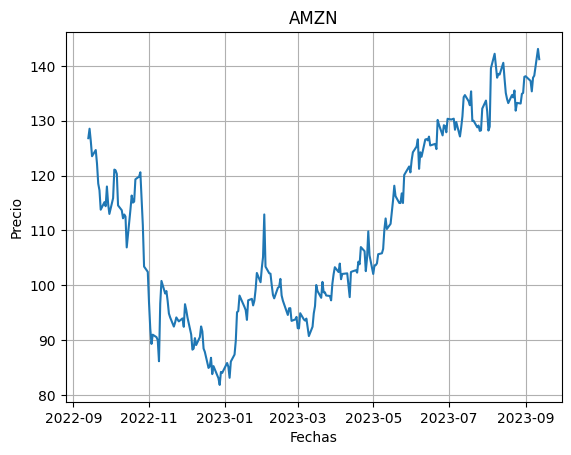

In [ ]:
#@title Número del activo que se visualizará
activo =  'ticker3' #@param ["ticker1", "ticker2", "ticker3"]
if activo == 'ticker1':
  priceplot = price1
  text = ticker1
elif activo == 'ticker2':
  priceplot = price2
  text = ticker2
elif activo == 'ticker3':
  priceplot = price3
  text = ticker3
# Visualizar la evolucion de los precios del ticker 1
plt.plot(priceplot.index,priceplot.Close)
plt.title('%s'%(text))
plt.xlabel('Fechas'),plt.ylabel('Precio')
plt.grid()

# **2.- Estandarización de los datos**
Generalmente las series de tiempo de precios dependen de la valuación de cada una de las empresas y el tipo de moneda en el que se realiza está valuación. Por lo que es importante tener una forma de estandarizar los precios para poder hacer comparaciones entre los comportamientos de las empresas.

Una de las opciones para realizar esto, es calcular los rendimientos de los precios durante todo el periodo de estudio.

In [ ]:
# Obtencion del rendimiento de las series de tiempo
r1 = rendimientos(price1.Close)
r2 = rendimientos(price2.Close)
r3 = rendimientos(price3.Close)

Visualizar el comportamiento en funcion de los rendimientos obtenidos.

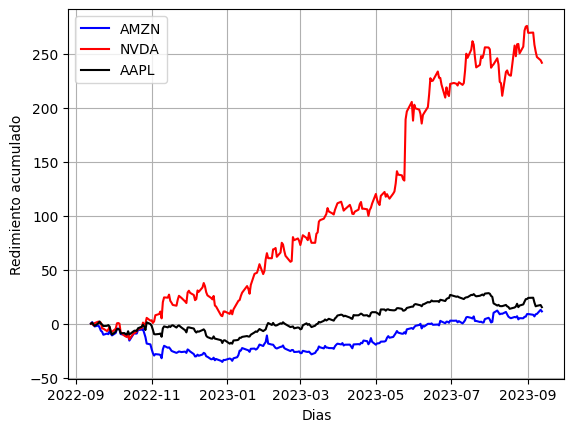

In [ ]:
plt.plot((price1.Close/price1.Close[0]-1)*100,'b',label=ticker1)
plt.plot((price2.Close/price2.Close[0]-1)*100,'r',label=ticker2)
plt.plot((price3.Close/price3.Close[0]-1)*100,'k',label=ticker3)
plt.legend((ticker1,ticker2,ticker3))
plt.xlabel('Dias'),plt.ylabel('Redimiento acumulado')
plt.grid()

# **3.- Descripción estadística**
El redimiento promedio se considera como un factor que nos marca el redimiento esperado en el periodo de estudio. El riesgo de invertir en un determinado activo está relacionado con la variabilidad de los precios en el periodo, lo cual se peude medir por medio de la varianza.

Rendimiento diario esperado: 0.080%, Riesgo: 1.780%


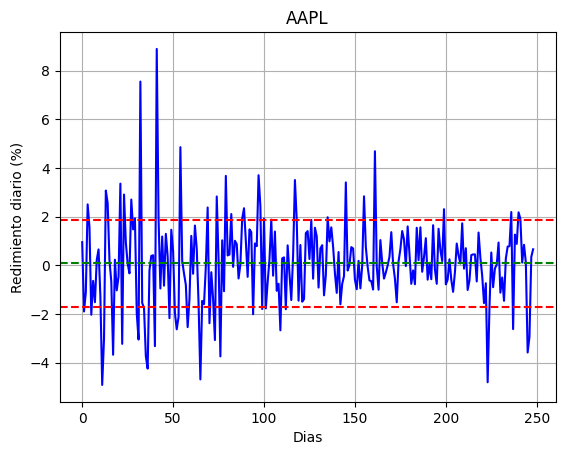

In [ ]:
#@title Número del activo que se visualizará
activo =  'ticker3' #@param ["ticker1", "ticker2", "ticker3"]
if activo == 'ticker1':
  r = r1
  text = ticker1
elif activo == 'ticker2':
  r = r2
  text = ticker2
elif activo == 'ticker3':
  r = r3
  text = ticker3
plt.plot(r*100,'b')
plt.axhline(y=np.mean(r)*100,color='g', linestyle='--')
plt.axhline(y=(np.mean(r)+np.std(r))*100,color='r', linestyle='--')
plt.axhline(y=(np.mean(r)-np.std(r))*100,color='r', linestyle='--')
plt.title(text)
plt.xlabel('Dias'),plt.ylabel('Redimiento diario (%)')
plt.grid()
print('Rendimiento diario esperado: %0.3f%%, Riesgo: %0.3f%%'%(np.mean(r)*100,np.std(r)*100))

In [ ]:
resumen = pd.DataFrame(index=['Rend (%)','Risk (%)'])
resumen[ticker1] = [np.mean(r1)*100,np.std(r1)*100]
resumen[ticker2] = [np.mean(r2)*100,np.std(r2)*100]
resumen[ticker3] = [np.mean(r3)*100,np.std(r3)*100]
resumen

,AMZN,NVDA,AAPL
Rend (%),0.078031,0.555947,0.079771
Risk (%),2.438855,3.480607,1.779609


# **4.- Construcción de un portafolio**
La construcción de portafolio se realiza cuando se toma la decisión de la cantidad de dinero que se invertira en cada uno de los activos. Generalmente, la cantidad de dinero se expresa mejor como una proporción de la cantidad total a invertir.

Por ejemplo: Si pensamos que tenemos un **100 %** de dinero, es posible invertir 20% en el ticker1, 20% en el ticker2 y el resto 60% en el ticker3.

En esta actividad tomaremos en cuenta que el 100% del dinero se encuentra invertido en todo el portafolio. Es decir no existe un monto de dinero que no se invierte.

Teniendo en mente lo anterior, el rendimiento esperado del portafolio se expresa como:

$R_{portafolio}=r_{1}x_{1}+r_{2}x_{2}+r_{3}x_{3}$

El riesgo del portafolio se basa en las covarianzas de las 3 series y se expresa como:

$\sigma_{portafolio}=\sqrt{\sigma_{11}x_{1}^{2}+2\sigma_{12}x_{1}x_{2}+2\sigma_{13}x_{1}x_{3}+\sigma_{22}x_{2}^{2}+2\sigma_{23}x_{2}x_{3}+\sigma_{33}x_{3}^{2}}$



In [ ]:
#@title Selección de las ponderaciones para invertir
x1 =  0.5#@param {type:"number"}
x2 =  0.3#@param {type:"number"}

Rs = np.zeros((np.shape(r1)[0],3))
Rs[:,0] = r1
Rs[:,1] = r2
Rs[:,2] = r3
covar = np.cov(Rs.T)
R =  np.zeros((1,3))
R[:,0] = np.mean(r1)
R[:,1] = np.mean(r2)
R[:,2] = np.mean(r3)
X = np.zeros((1,3))
X[0,:] = [x1,x2,1-x1-x2]
Rend_p = np.dot(X,R.T)
Risk_p = np.sqrt(np.dot(np.dot(X,covar),np.transpose(X)))

print('INFORMACIÓN DE ACTIVOS')
print('Rendimientos individuales de los activos: %s = %0.3f %%, %s = %0.3f %%, %s = %0.3f %%'%(ticker1,np.mean(r1)*100,ticker2,np.mean(r2)*100,ticker3,np.mean(r3)*100))
print('Riesgos individuales de los activos: %s = %0.3f %%, %s = %0.3f %%, %s = %0.3f %%'%(ticker1,np.std(r1)*100,ticker2,np.std(r2)*100,ticker3,np.std(r3)*100))
print('\nRESUMEN DE PORTFOLIO')
print('Capital Invertido: %0.1f %% en %s, %0.1f %% en %s, %0.1f %% en %s'%(100*x1,ticker1,100*x2,ticker2,100*(1-x1-x2),ticker3))
print('Redimiento Portafolio: %0.3f %%'%(Rend_p*100))
print('Riesgo Portafolio: %0.3f %%'%(Risk_p*100))

INFORMACIÓN DE ACTIVOS
Rendimientos individuales de los activos: AMZN = 0.078 %, NVDA = 0.556 %, AAPL = 0.080 %
Riesgos individuales de los activos: AMZN = 2.439 %, NVDA = 3.481 %, AAPL = 1.780 %

RESUMEN DE PORTFOLIO
Capital Invertido: 50.0 % en AMZN, 30.0 % en NVDA, 20.0 % en AAPL
Redimiento Portafolio: 0.222 %
Riesgo Portafolio: 2.183 %


# **5.- ¿Como busco el mejor portafolio?**
Para responder está pregunta se debe de tener en cuenta que se cuenta con un número grande de posibilidades para armar el portafolio. Y estas posibilidades crece en función como voy agregando activos al portafolio.

Una posibilidad es simular un gran número de portafolio para obtener sus rendimientos y riesgos. Después hacer el análisis de los portafolios encoentrados para tomar una decisión.

INFORMACIÓN DE ACTIVOS
Rendimientos individuales de los activos: AMZN = 0.078 %, NVDA = 0.556 %, AAPL = 0.080 %
Riesgos individuales de los activos: AMZN = 2.439 %, NVDA = 3.481 %, AAPL = 1.780 %

RESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO
Rendimiento diario: 0.080 %; x1=19.01%, x2=0.18%, x3=80.81%
Riesgo: 1.731 %

RESUMEN BÚSQUEDA PORTAFOLIO CON GANANCIAS
Rendimiento diario: 0.080 %; x1=19.01%, x2=0.18%, x3=80.81%
Riesgo: 1.731 %


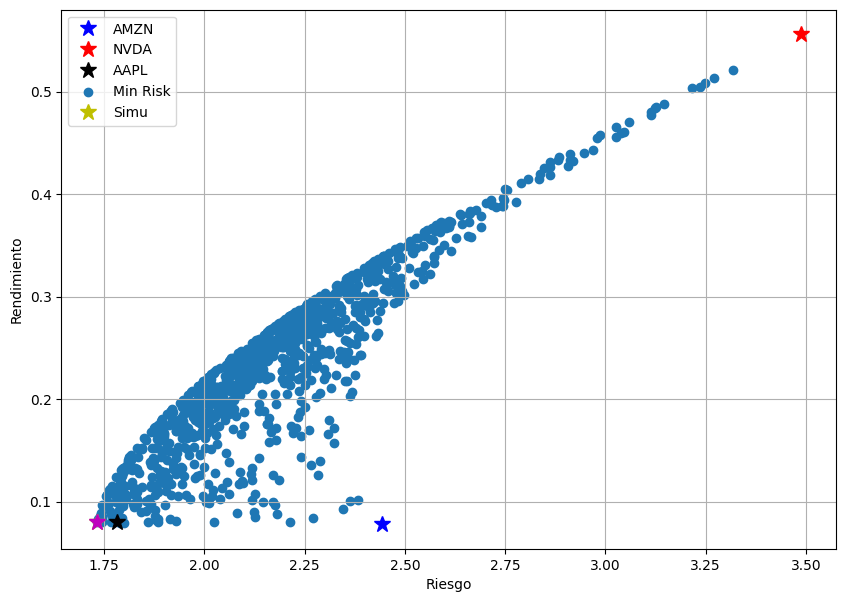

In [ ]:
#@title Simulaciones del portafolio requeridas
n_simulaciones = 1000 #@param {type:"integer"}

X = np.random.rand(n_simulaciones,3)
Rend_p = np.zeros((n_simulaciones,1))
Risk_p = np.zeros((n_simulaciones,1))
for k in range(n_simulaciones):
  X[k,:] = X[k,:]/np.sum(X[k,:]) #Normalizar los valores aleatorios
  Rend_p[k,:] = np.dot(X[k,:],R.T)
  Risk_p[k,:] = np.sqrt(np.dot(np.dot(X[k,:],covar),np.transpose(X[k,:])))

Portfolios = pd.DataFrame()
Portfolios[ticker1] = X[:,0]
Portfolios[ticker2] = X[:,1]
Portfolios[ticker3] = X[:,2]
Portfolios['Rend'] = Rend_p
Portfolios['Risk'] = Risk_p

idx_min = np.argmin(Portfolios['Risk'])

tmp = Portfolios[Portfolios['Rend']>0]
idx_min_pos = tmp.index[np.argmin(tmp['Risk'])]

plt.figure(figsize=(10,7))
plt.plot(np.sqrt(covar[0,0])*100,R[0,0]*100,'b*',markersize=12)
plt.plot(np.sqrt(covar[1,1])*100,R[0,1]*100,'r*',markersize=12)
plt.plot(np.sqrt(covar[2,2])*100,R[0,2]*100,'k*',markersize=12)
plt.scatter(Portfolios['Risk']*100,Portfolios['Rend']*100)
plt.plot(Portfolios['Risk'][idx_min]*100,Portfolios['Rend'][idx_min]*100,'y*',markersize=12)
plt.plot(Portfolios['Risk'][idx_min_pos]*100,Portfolios['Rend'][idx_min_pos]*100,'m*',markersize=12)
plt.xlabel('Riesgo'),plt.ylabel('Rendimiento')
plt.legend((ticker1,ticker2,ticker3,'Min Risk','Simu'))
plt.grid()

print('INFORMACIÓN DE ACTIVOS')
print('Rendimientos individuales de los activos: %s = %0.3f %%, %s = %0.3f %%, %s = %0.3f %%'%(ticker1,np.mean(r1)*100,ticker2,np.mean(r2)*100,ticker3,np.mean(r3)*100))
print('Riesgos individuales de los activos: %s = %0.3f %%, %s = %0.3f %%, %s = %0.3f %%'%(ticker1,np.std(r1)*100,ticker2,np.std(r2)*100,ticker3,np.std(r3)*100))
print('\nRESUMEN BÚSQUEDA PORTAFOLIO MENOR RIESGO')
print('Rendimiento diario: %0.3f %%; x1=%0.2f%%, x2=%0.2f%%, x3=%0.2f%%'%(Portfolios['Rend'][idx_min]*100,Portfolios[ticker1][idx_min]*100,Portfolios[ticker2][idx_min]*100,Portfolios[ticker3][idx_min]*100))
print('Riesgo: %0.3f %%'%(Portfolios['Risk'][idx_min]*100))
print('\nRESUMEN BÚSQUEDA PORTAFOLIO CON GANANCIAS')
print('Rendimiento diario: %0.3f %%; x1=%0.2f%%, x2=%0.2f%%, x3=%0.2f%%'%(Portfolios['Rend'][idx_min_pos]*100,Portfolios[ticker1][idx_min_pos]*100,Portfolios[ticker2][idx_min_pos]*100,Portfolios[ticker3][idx_min_pos]*100))
print('Riesgo: %0.3f %%'%(Portfolios['Risk'][idx_min_pos]*100))


In [ ]:
import plotly.express as px
data = pd.DataFrame(X*100,columns=[ticker1,ticker2,ticker3])
data['Rend'] = Rend_p[:,0]*100
data['Risk'] = Risk_p[:,0]*100

fig = px.scatter(data,x="Risk",y="Rend", hover_data=data.columns[:3])
px.scatter(data,x="Risk",y="Rend", hover_data=data.columns[:3])
fig.show()